In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeRegressor

In [2]:
import os
os.getcwd()

'/Users/shikharaikhare/Documents/Data_Mining/Project'

In [3]:
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#### 1. Data Cleaning and Exploration:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [7]:
# renaming the column
df.rename(columns={'order date (DateOrders)': 'Order_Date'}, inplace = True)

In [8]:
missing_values = df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market   

### SMART QUESTION 3:
#### How does the product category relate to sales performance, and can this insight inform inventory stocking?

Check the unique product categories in the dataset

In [9]:
print(df['Category Name'].unique())

['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "Men's Golf Clubs" 'Toys' 'Water Sports' 'Indoor/Outdoor Games']


In [10]:
category_count = df['Category Name'].nunique()
print(category_count)

50


In [11]:
print(df.groupby(['Category Name'])['Sales'].median())

Category Name
Accessories               74.970001
As Seen on  TV!          299.970001
Baby                      59.080002
Baseball & Softball      139.960007
Basketball               299.989990
Books                     31.080000
Boxing & MMA             164.910004
CDs                       11.290000
Cameras                  452.040008
Camping & Hiking         299.980011
Cardio Equipment         299.970001
Children's Clothing      357.100006
Cleats                   179.970001
Computers               1500.000000
Consumer Electronics     252.880005
Crafts                   461.480011
DVDs                     164.380005
Electronics              103.980003
Fishing                  399.980011
Fitness Accessories      104.970001
Garden                   532.580017
Girls' Apparel           119.970001
Golf Apparel              79.959999
Golf Bags & Carts        169.990005
Golf Balls                53.970001
Golf Gloves               79.980003
Golf Shoes               195.000000
Health and Bea

#### 2. Visualization for Sales Performance:

Visualize the sales performance across different product categories using bar plots or box plots.

In [12]:
category_sales = df.groupby('Category Name')['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by = 'Sales', ascending = False)

In [68]:
category_sales

,Category Name,Sales
18,Fishing,6.929654e+06
12,Cleats,4.431943e+06
9,Camping & Hiking,4.118426e+06
10,Cardio Equipment,3.694843e+06
47,Women's Apparel,3.147800e+06
46,Water Sports,3.113845e+06
34,Men's Footwear,2.891758e+06
30,Indoor/Outdoor Games,2.888994e+06
38,Shop By Sport,1.309522e+06
13,Computers,6.630000e+05


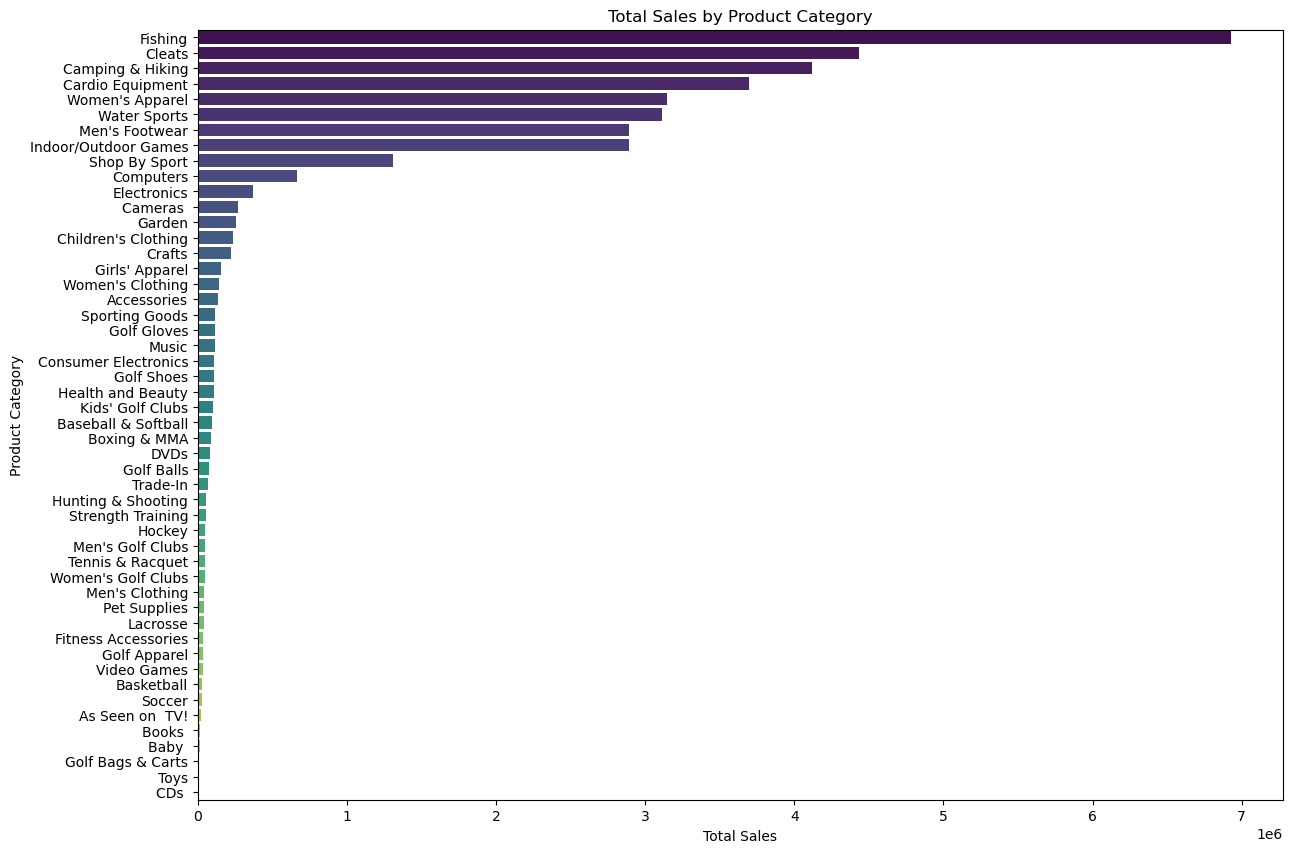

In [13]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='Category Name', data=category_sales, palette="viridis")
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Total Sales by Product Category')
plt.show()

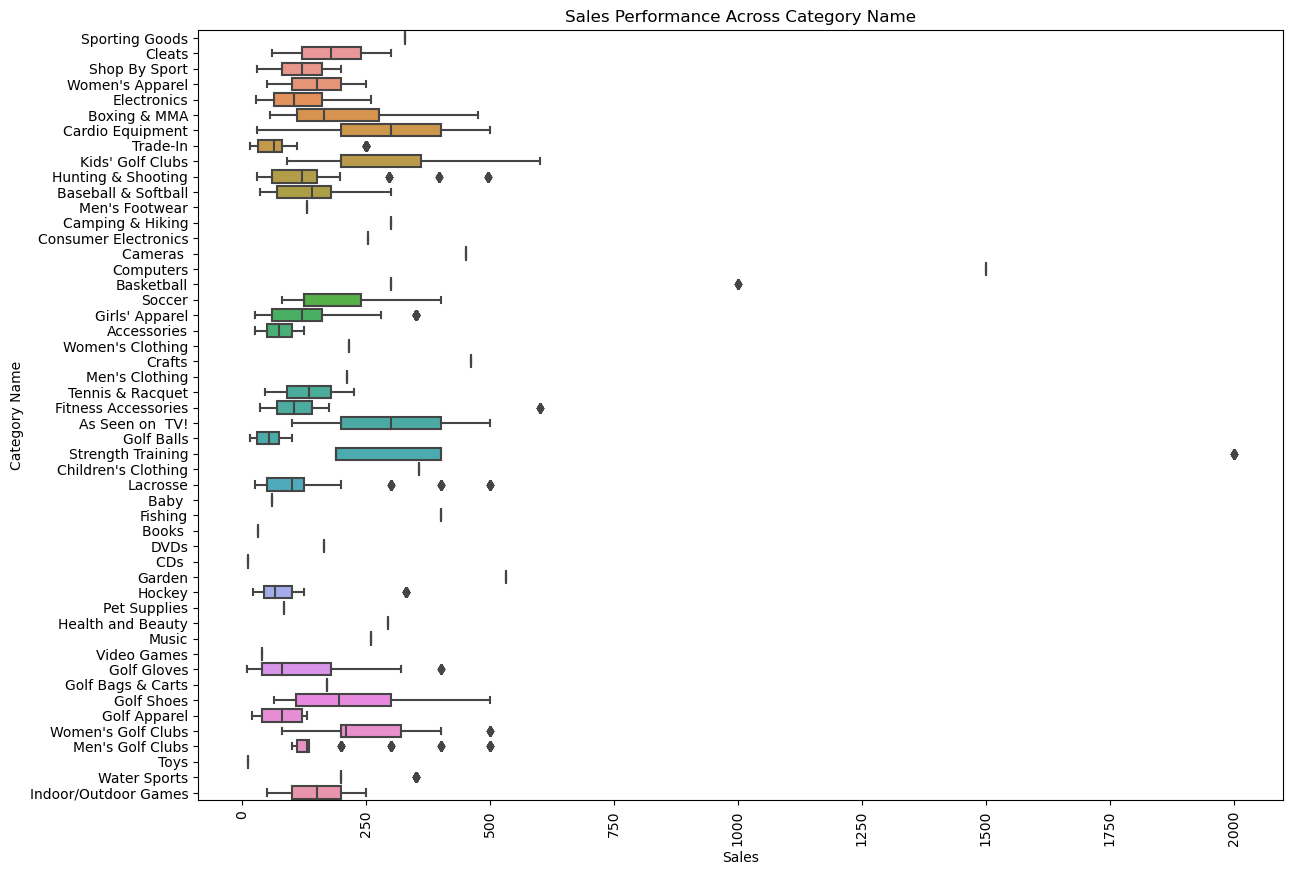

In [14]:
# Using box-plot
plt.figure(figsize=(14, 10))
sns.boxplot(x='Sales', y='Category Name', data=df)
plt.xticks(rotation=90)
plt.title('Sales Performance Across Category Name')
plt.show()

Let's visualize Customer Segment on each Category Name.

In [15]:
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [16]:
order_profit = df.groupby(['Customer Segment'])['Order Profit Per Order'].sum()

In [17]:
order_profit = order_profit.reset_index()

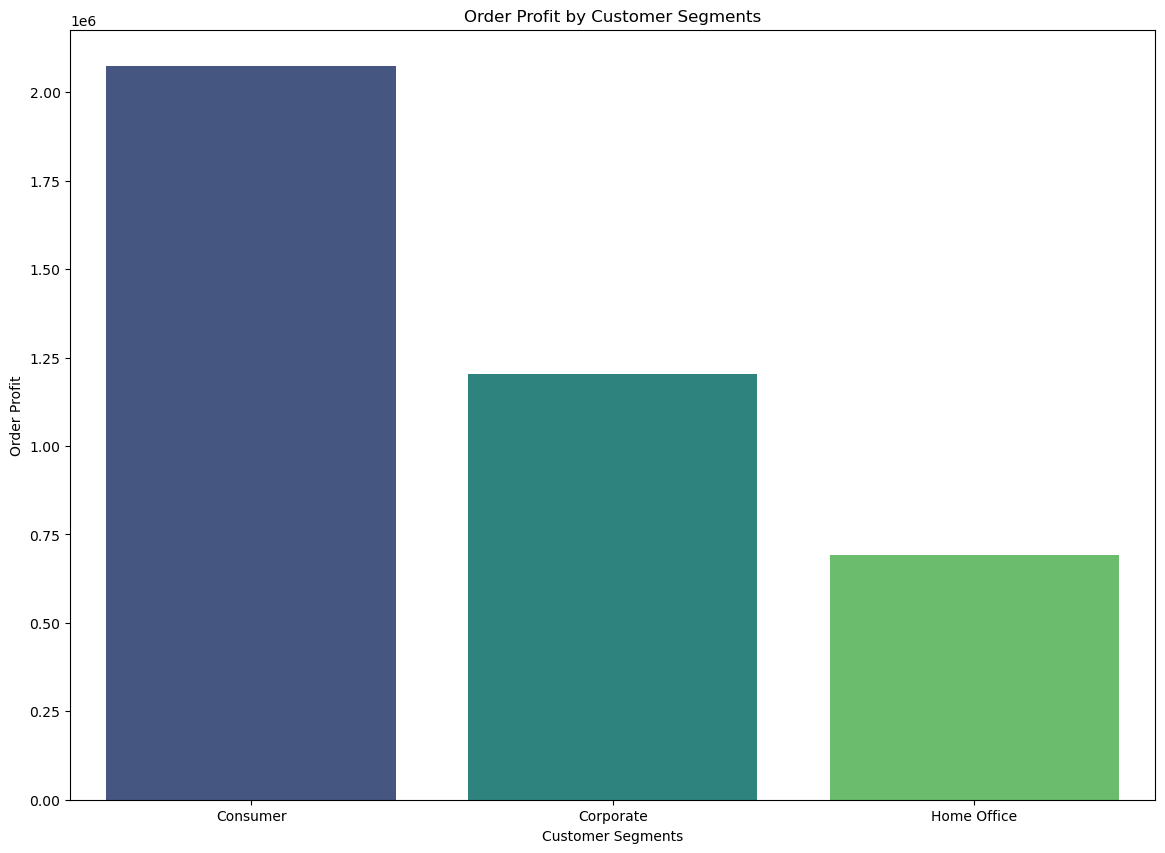

In [18]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Customer Segment', y='Order Profit Per Order', data=order_profit, palette="viridis")
plt.xlabel('Customer Segments')
plt.ylabel('Order Profit')
plt.title('Order Profit by Customer Segments')
plt.show()

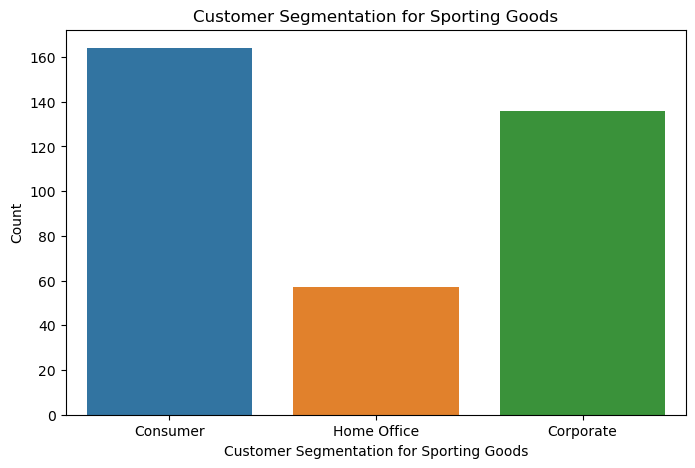

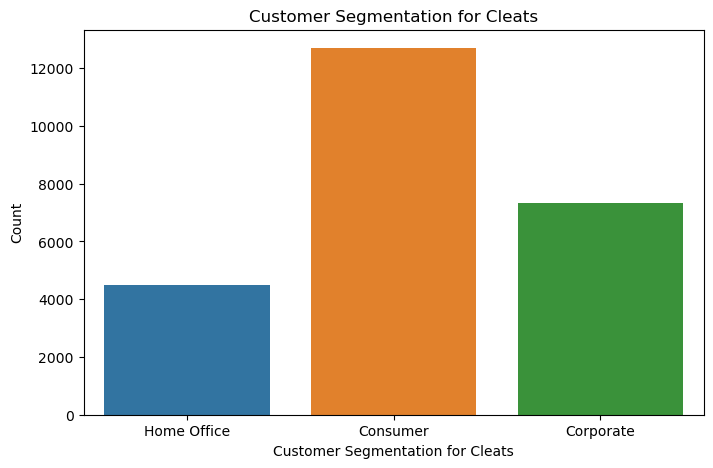

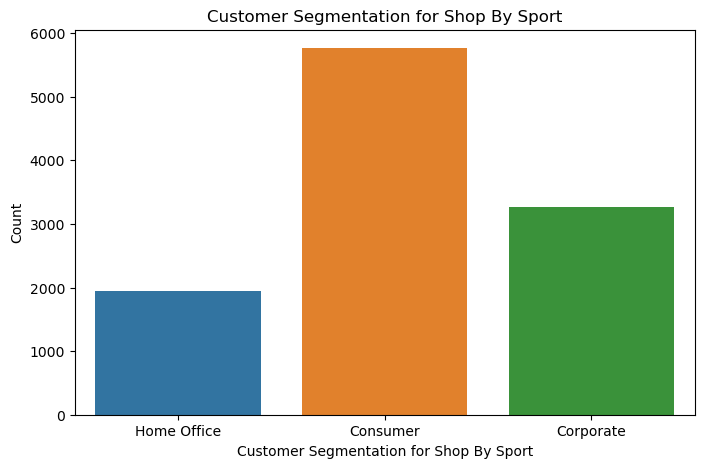

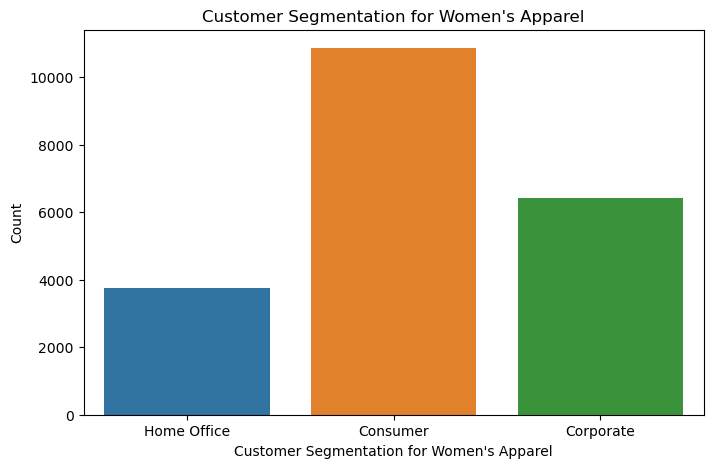

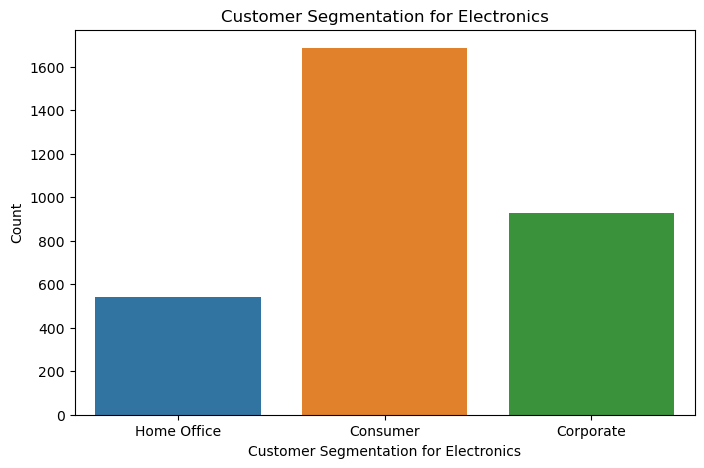

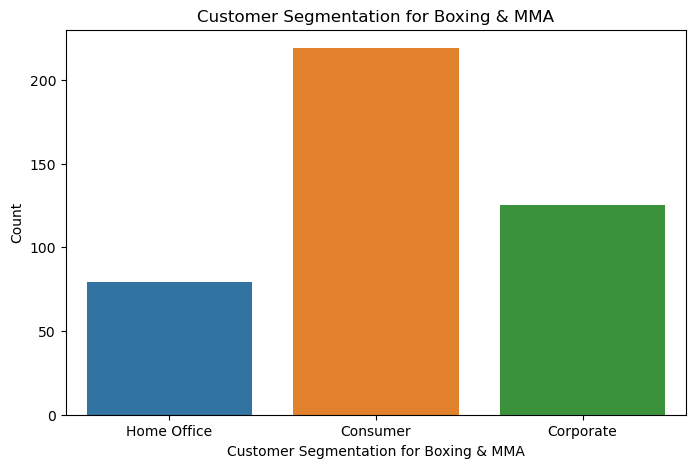

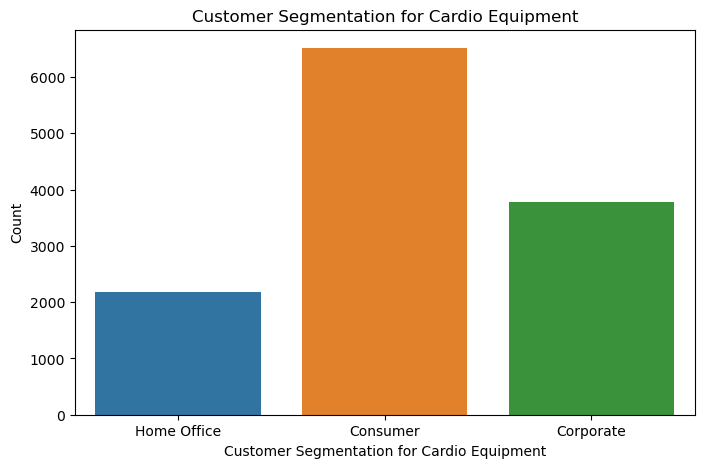

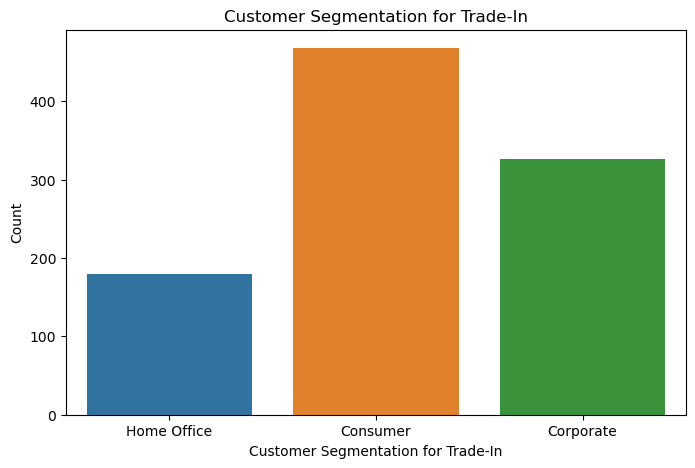

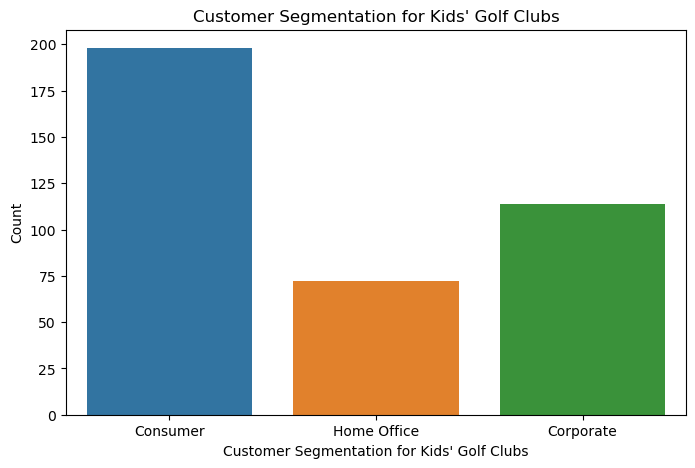

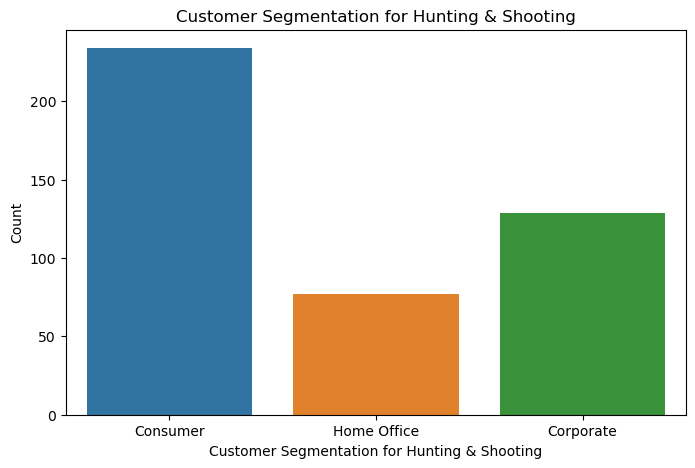

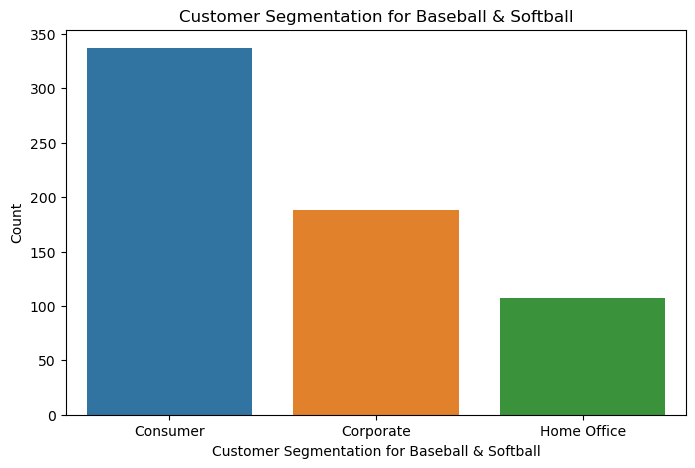

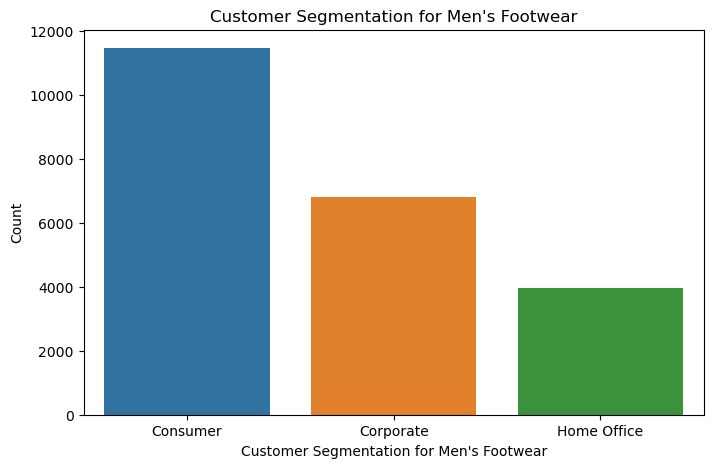

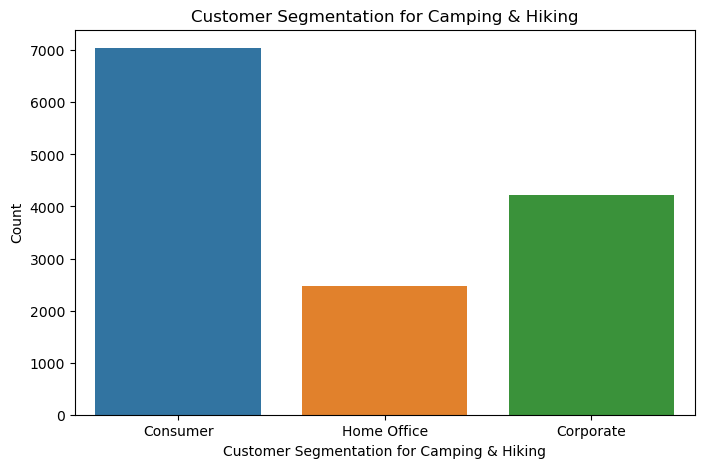

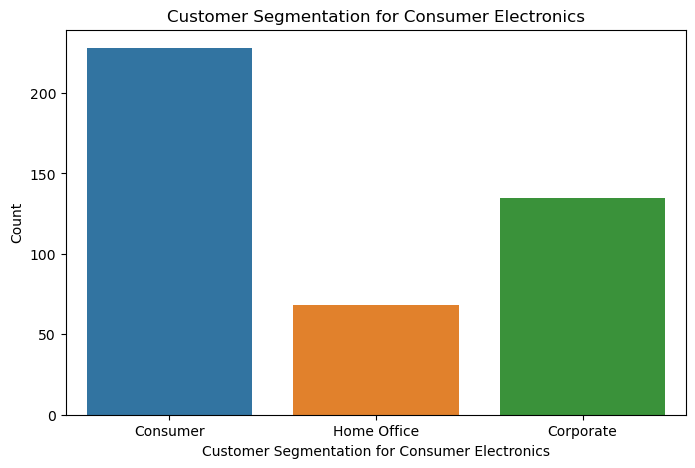

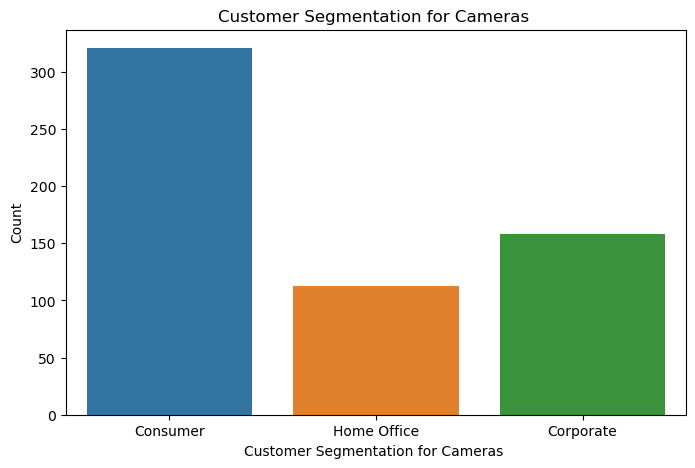

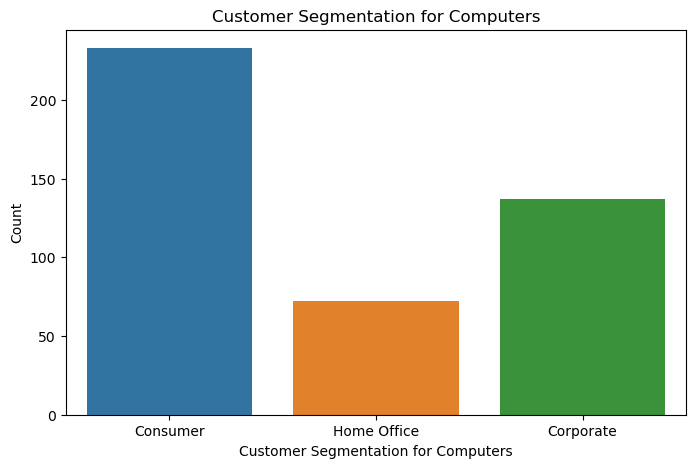

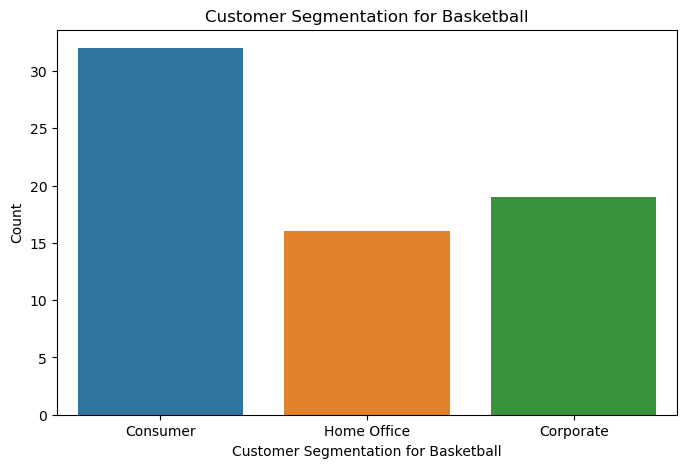

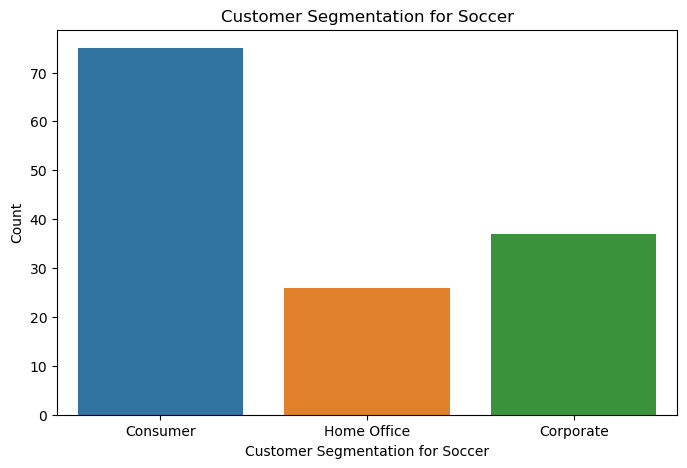

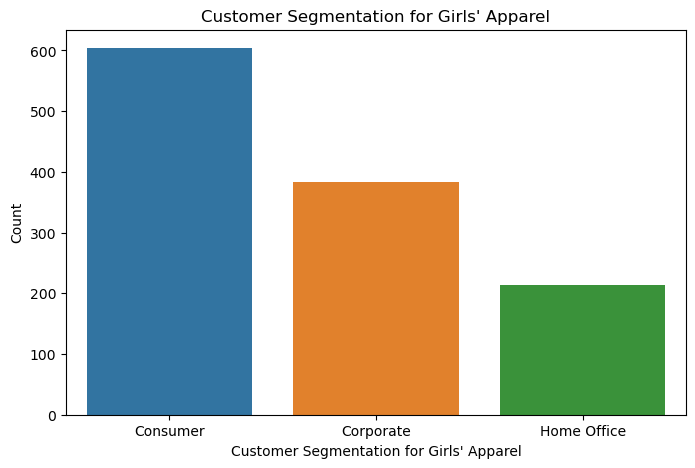

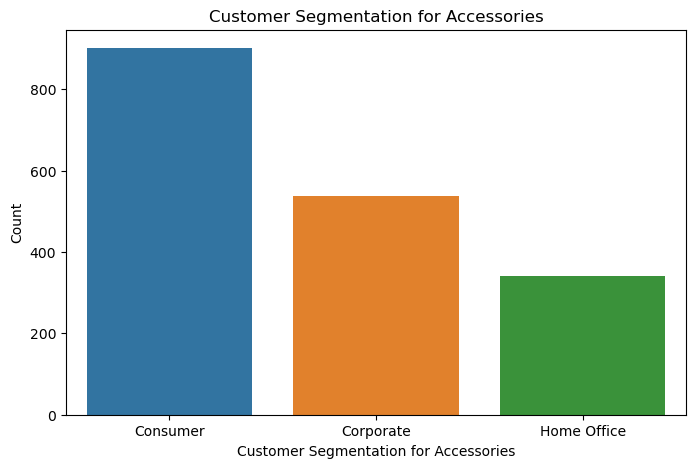

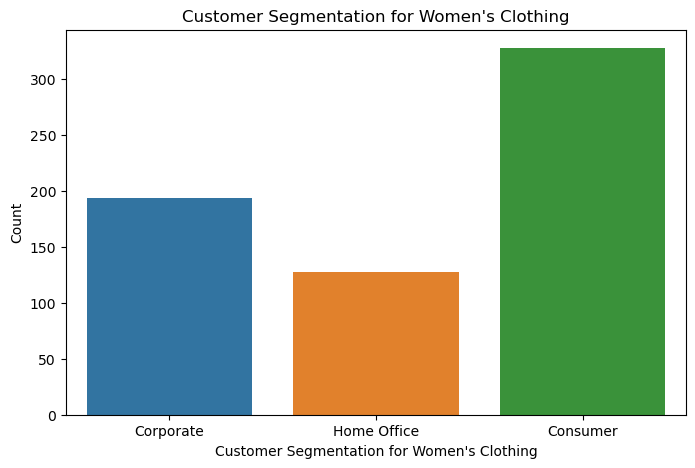

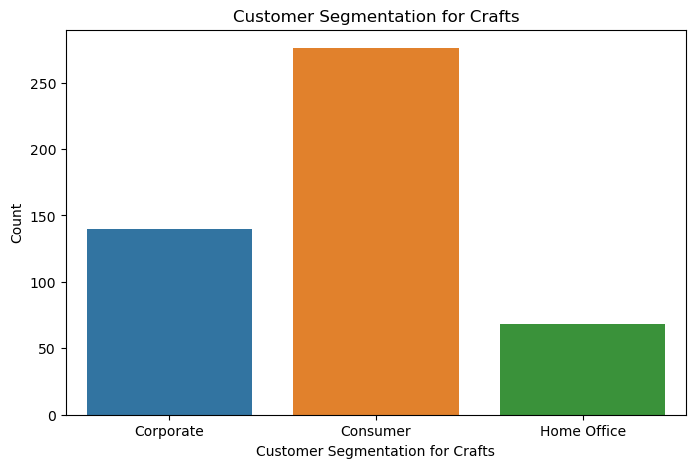

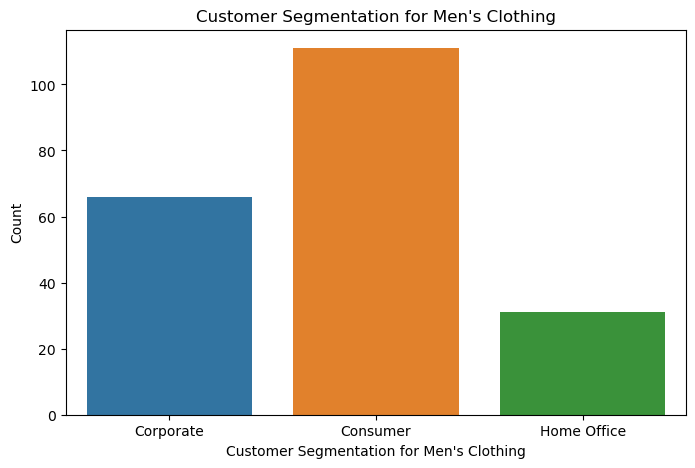

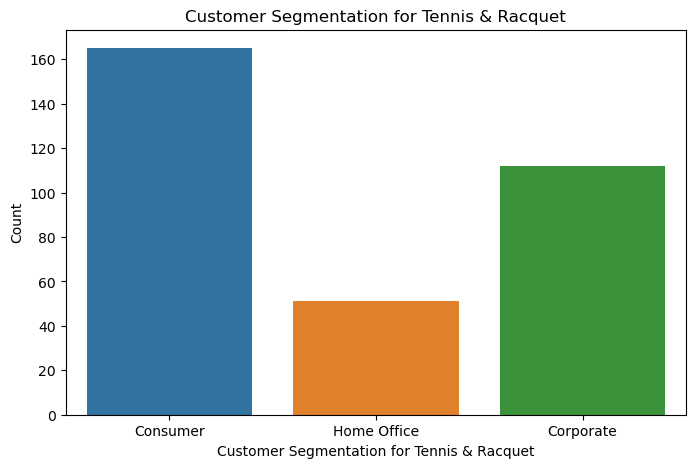

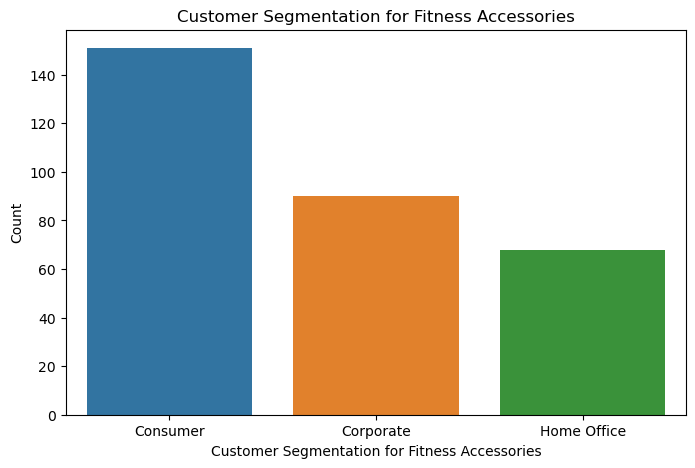

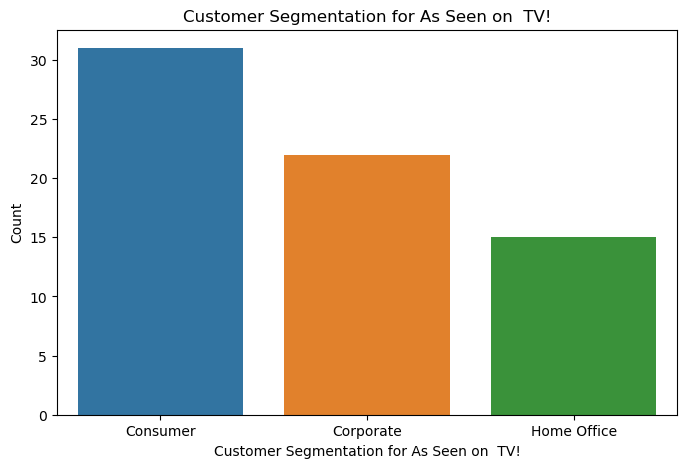

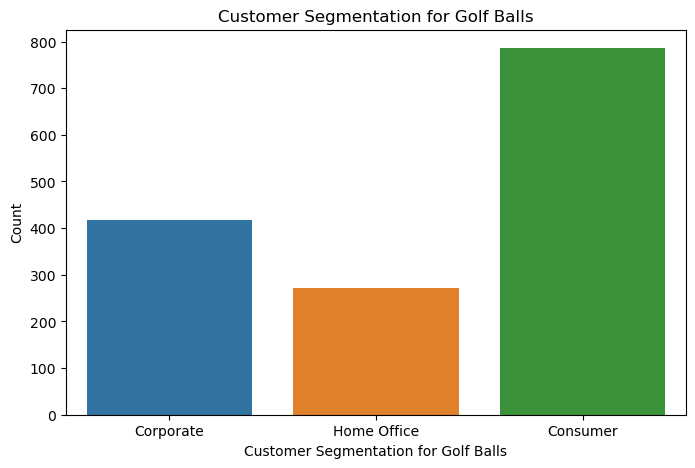

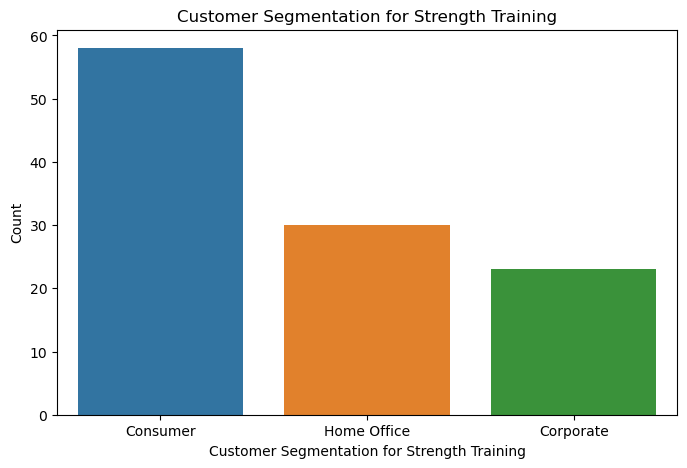

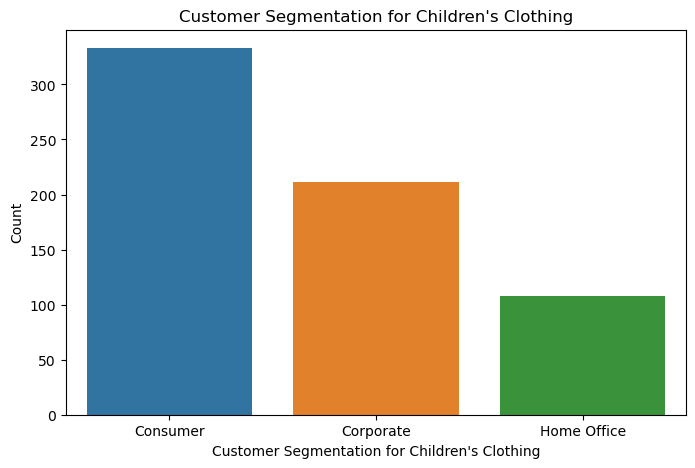

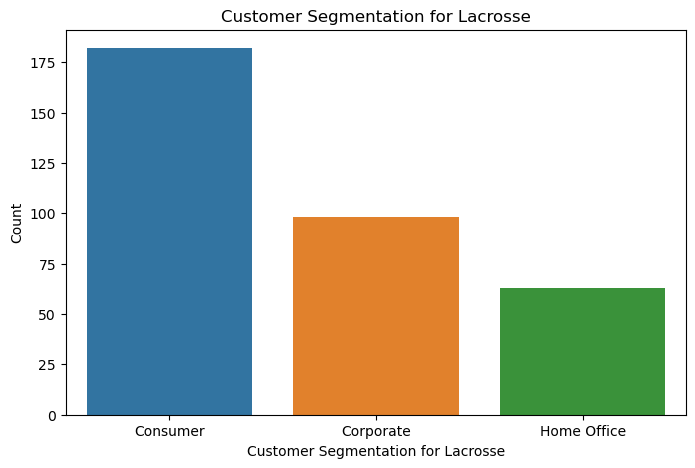

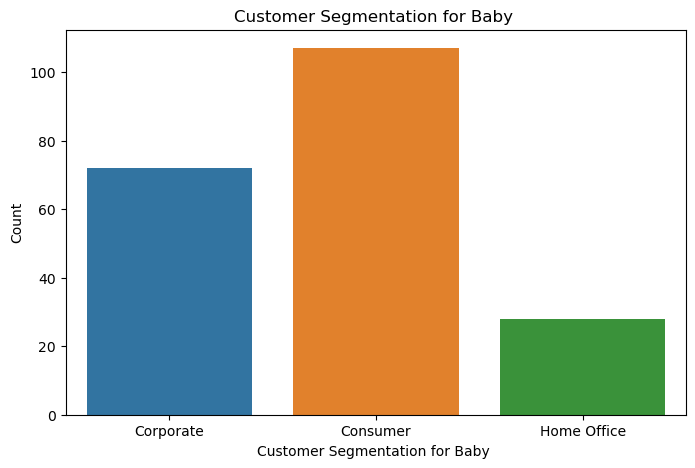

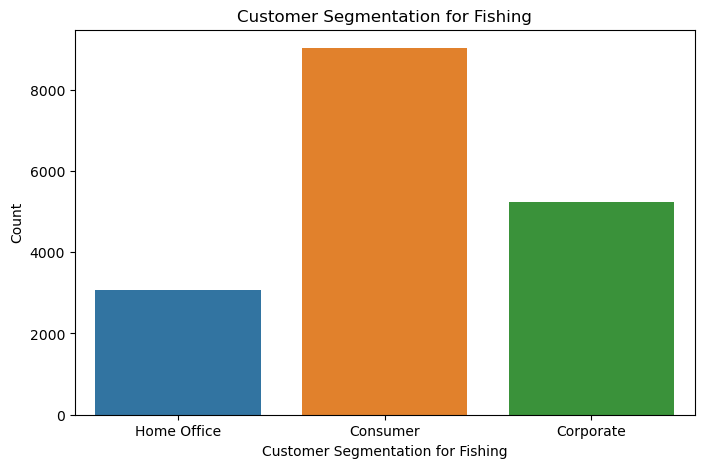

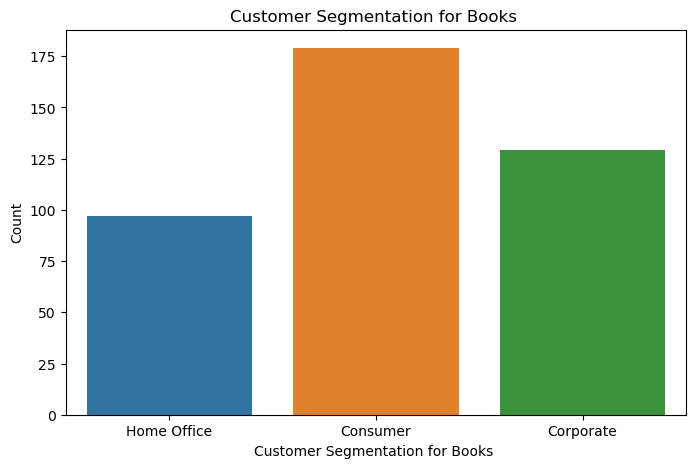

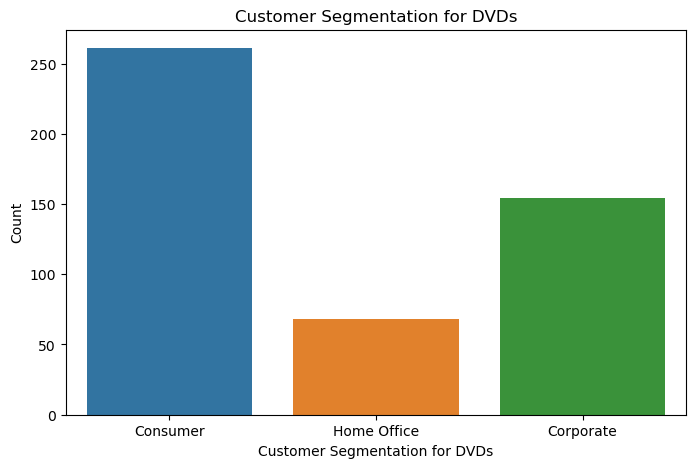

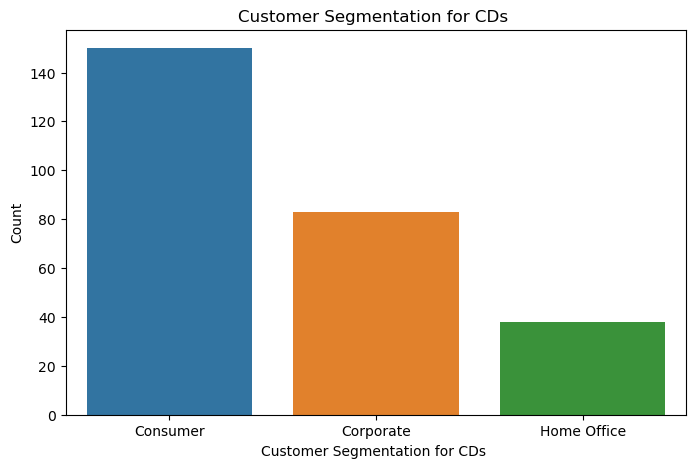

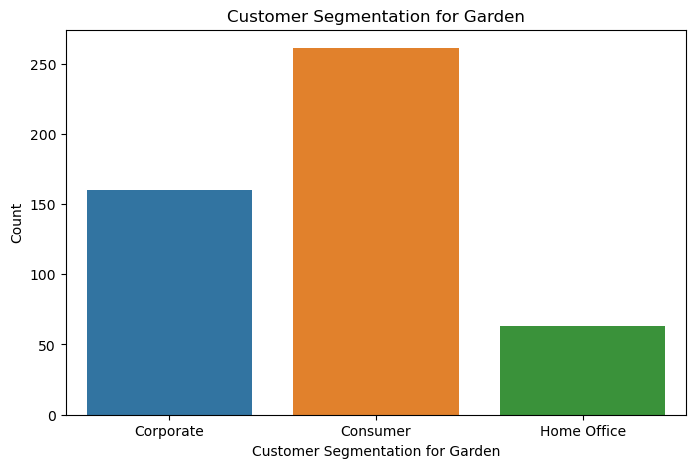

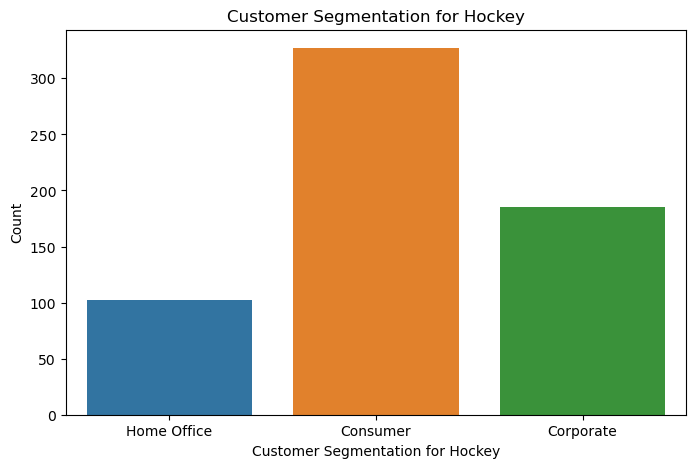

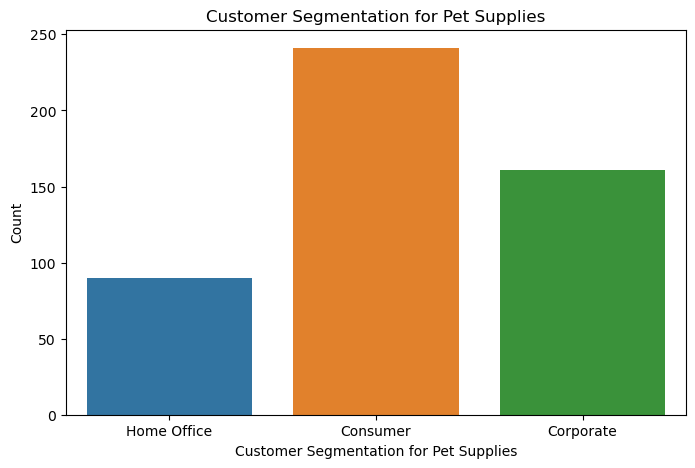

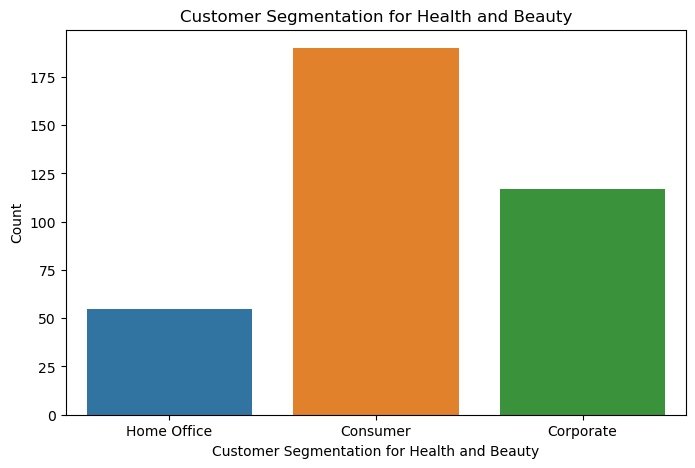

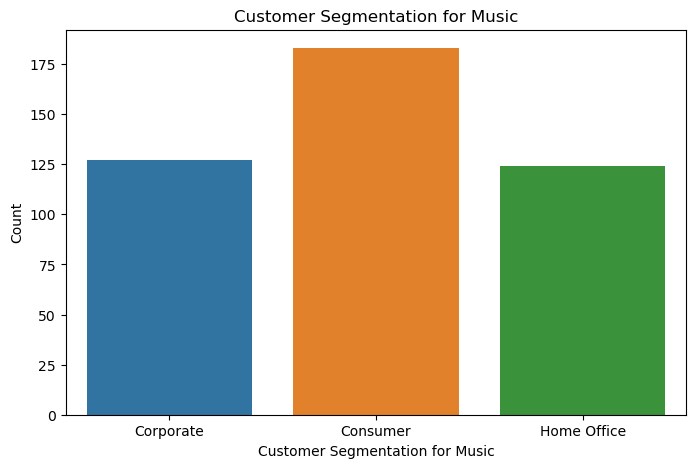

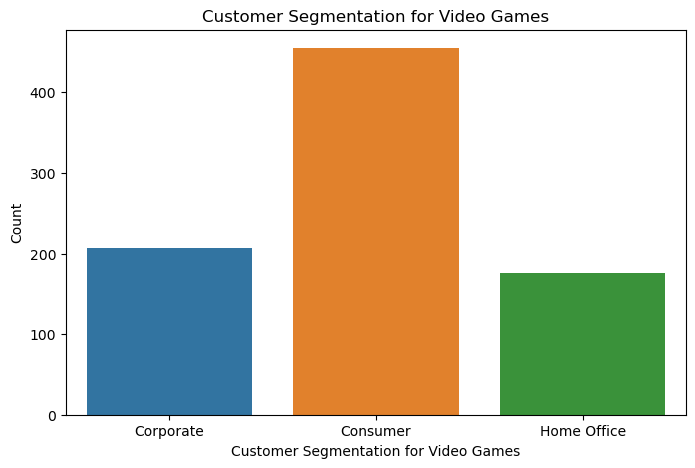

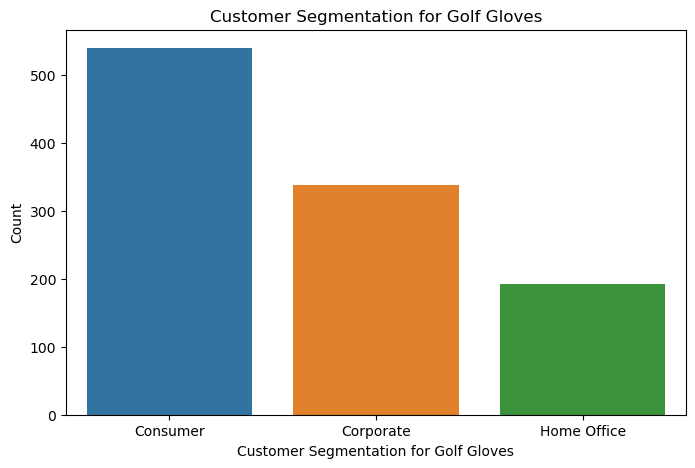

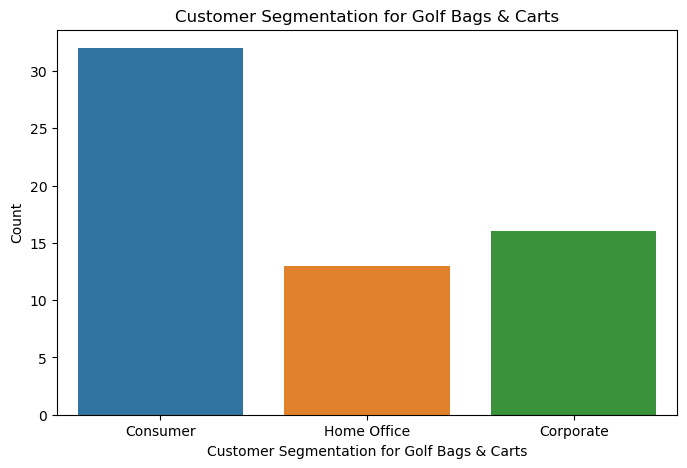

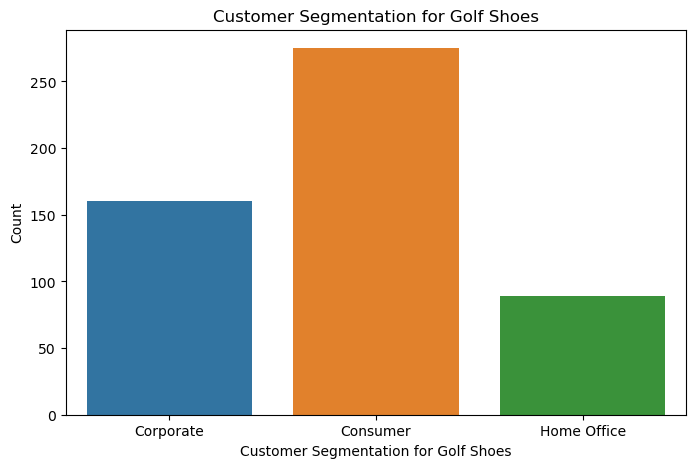

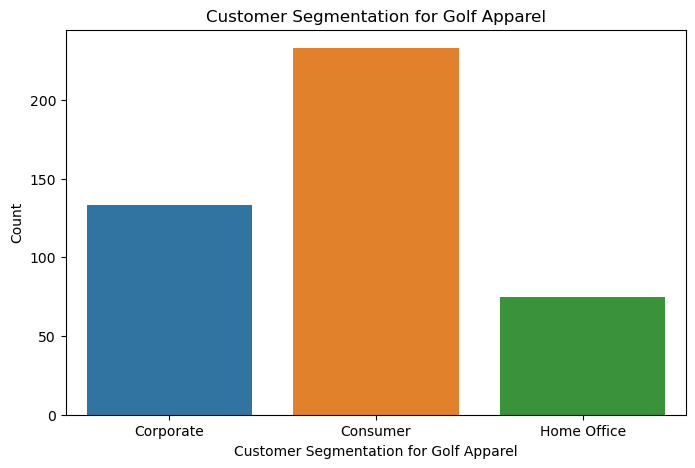

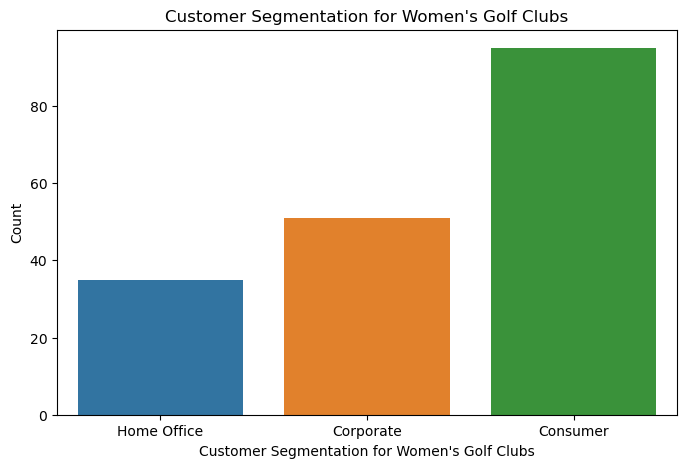

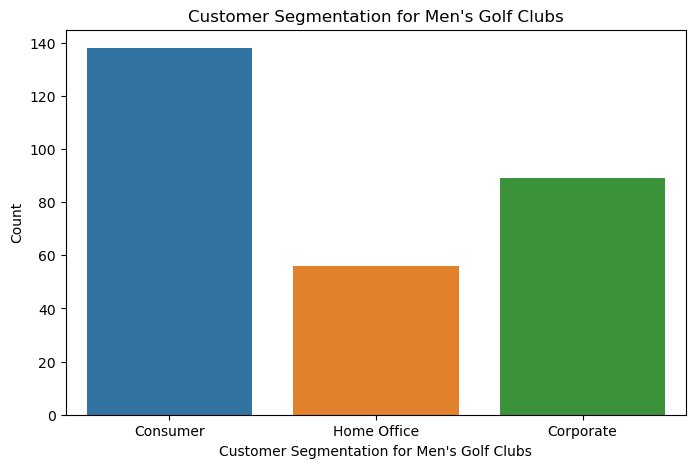

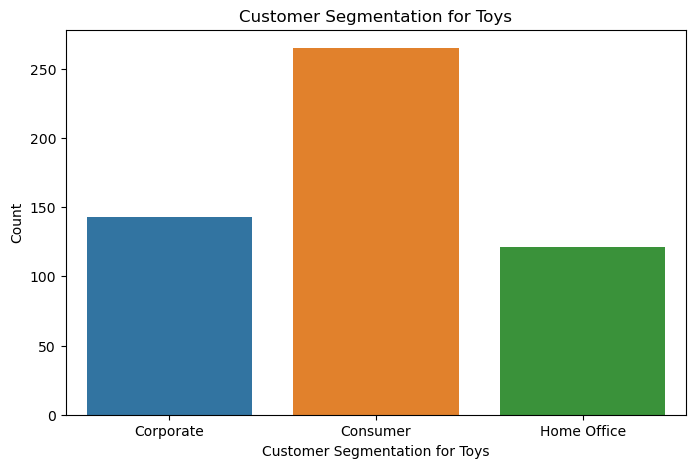

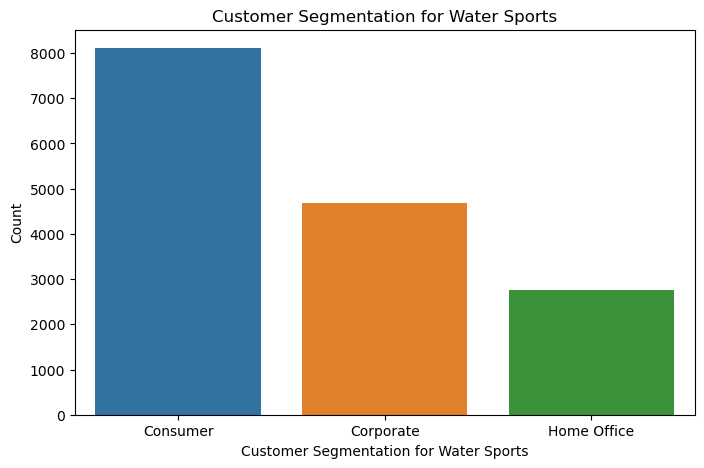

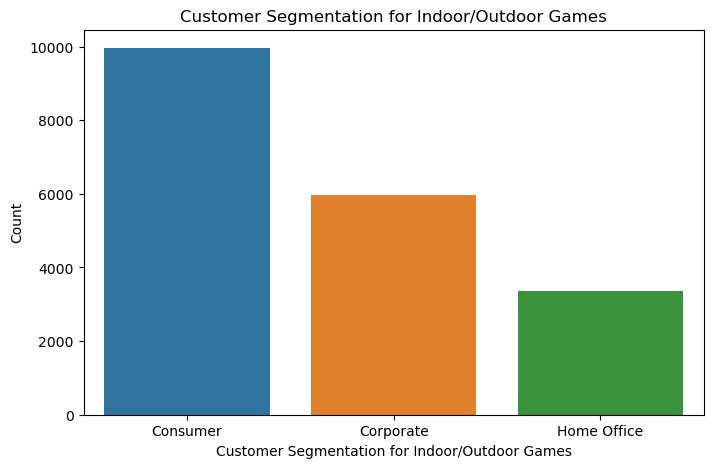

In [19]:
unique_categories = df['Category Name'].unique()

# Plotting separate count plots for each category
for category in unique_categories:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df[df['Category Name'] == category], x='Customer Segment')
    plt.title(f'Customer Segmentation for {category}')
    plt.xlabel(f'Customer Segmentation for {category}')
    plt.ylabel('Count')
    plt.show()

#### Feature Engineering:

In [20]:
def categorize_items(category_name):
    sports_keywords = ['Cleats', "Men's Footwear", 'Fishing', 'Indoor/Outdoor Games',
                       'Water Sports', 'Camping & Hiking', 'Cardio Equipment', 'Shop By Sport',
                       "Golf Balls", "Golf Gloves", 'Trade-In', 'Video Games', "Toys"
                        "Baseball & Softball", "Hockey", "Lacrosse", "Golf Apparel", "Hunting & Shooting", 
                        "Boxing & MMA", "Kids' Golf Clubs", "Fitness Accessories", "Men's Golf Clubs", "Strength Training",
                       "Tennis & Racquet", "Sporting Goods", "Golf Shoes", 'Soccer', 'Basketball', "Women's Golf Clubs"]

    clothing_keywords = ["Women's Apparel", "Children's Clothing", "Women's Clothing", "Girls' Apparel",
                 "Men's Clothing", 'Baby']

    gadgets_keywords = ['Electronics', 'Gadgets', 'Cameras', 'DVDs', 'Computers', 'Consumer Electronics',
                    'Music', 'CDs']
    health_beauty_keywords = ['Health and Beauty', 'Accessories']

    others =["Pet Supplies", "Crafts", "Garden", "Music", "Books"]

    if any(keyword in category_name for keyword in sports_keywords):
        return 'Sports'
    elif any(keyword in category_name for keyword in clothing_keywords):
        return 'Clothing'
    elif any(keyword in category_name for keyword in gadgets_keywords):
        return 'Gadgets'
    elif any(keyword in category_name for keyword in health_beauty_keywords):
        return 'Health & Beauty'
    else:
        return 'Other'

In [21]:
# Apply the categorization function to create 'Category_Class' column
df['Category_Class'] = df['Category Name'].apply(categorize_items)

In [22]:
df['Category_Class'].unique()

array(['Sports', 'Clothing', 'Gadgets', 'Other', 'Health & Beauty'],
      dtype=object)

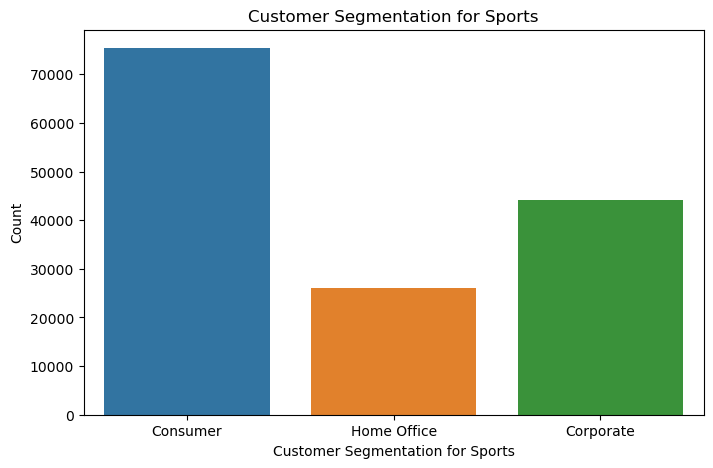

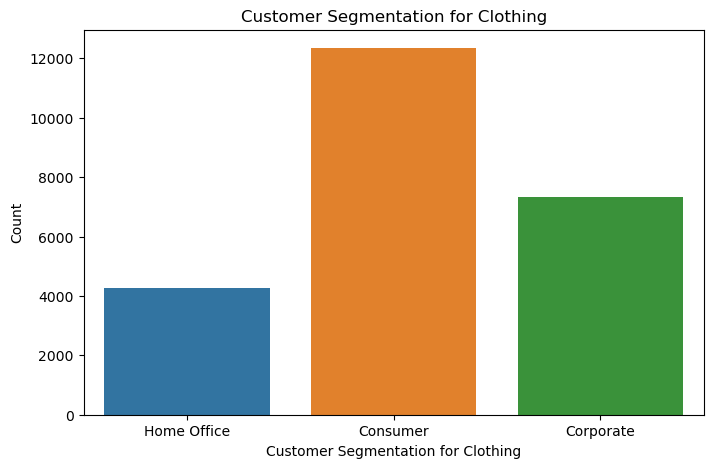

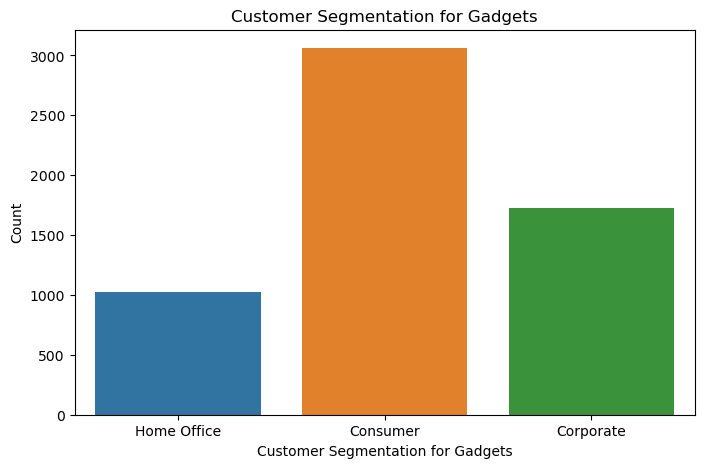

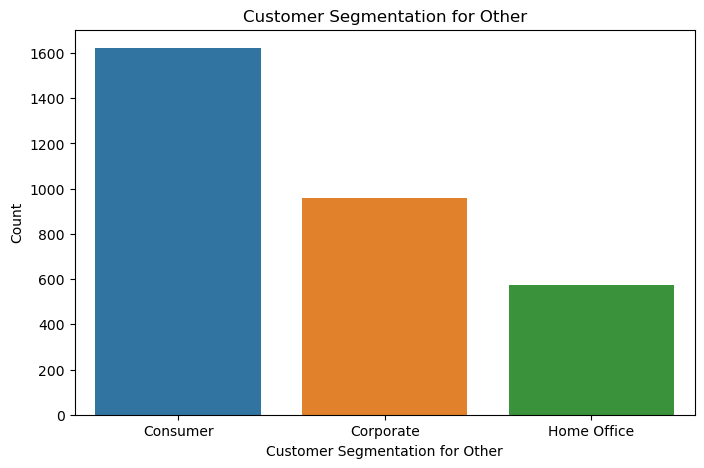

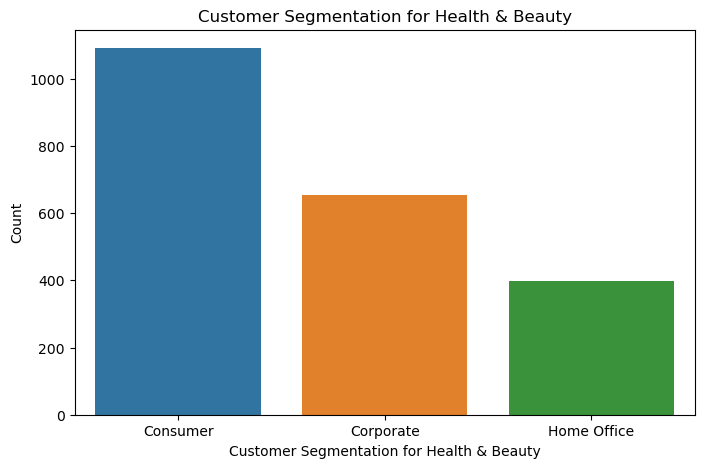

In [23]:
unique_categories = df['Category_Class'].unique()

# Plotting separate count plots for each category
for category in unique_categories:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df[df['Category_Class'] == category], x='Customer Segment')
    plt.title(f'Customer Segmentation for {category}')
    plt.xlabel(f'Customer Segmentation for {category}')
    plt.ylabel('Count')
    plt.show()

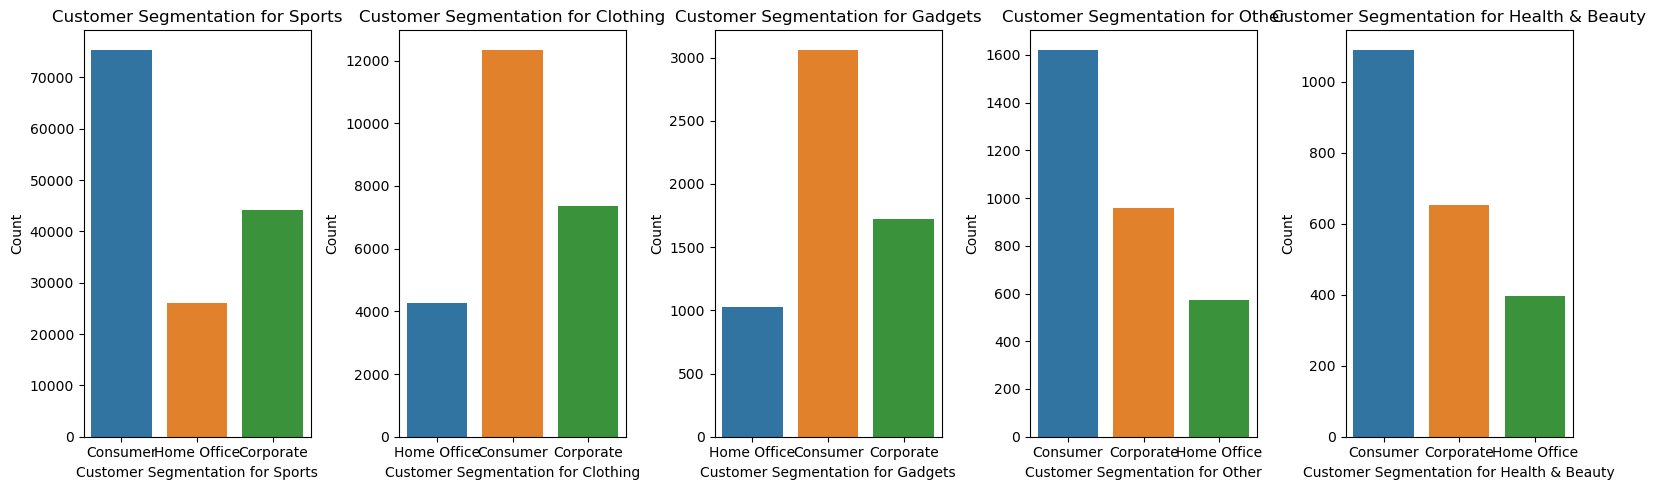

In [69]:

unique_categories = df['Category_Class'].unique()
num_categories = len(unique_categories)

# Create subplots for count plots
fig, axes = plt.subplots(nrows=1, ncols=num_categories, figsize=(16, 5))

# Plotting separate count plots for each category
for i, category in enumerate(unique_categories):
    sns.countplot(data=df[df['Category_Class'] == category], x='Customer Segment', ax=axes[i])
    axes[i].set_title(f'Customer Segmentation for {category}')
    axes[i].set_xlabel(f'Customer Segmentation for {category}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [26]:
# median tells the middle of the Sales per each order
df.groupby(['Customer Segment'])['Sales'].median()

Customer Segment
Consumer       199.919998
Corporate      199.919998
Home Office    199.919998
Name: Sales, dtype: float64

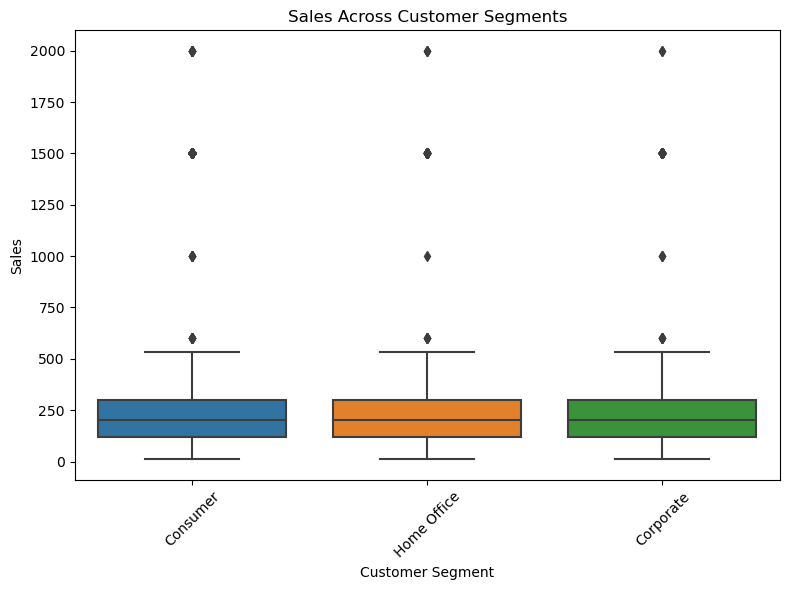

In [27]:
# Analyze sales across different customer segments
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer Segment', y='Sales', data=df)
plt.title('Sales Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
category_class_sales = df.groupby('Category_Class')['Sales'].sum().reset_index()
category_class_sales = category_class_sales.sort_values(by = 'Sales', ascending = False)

In [29]:
category_class_sales

,Category_Class,Sales
4,Sports,3.054370e+07
0,Clothing,3.728705e+06
1,Gadgets,1.606211e+06
3,Other,6.663664e+05
2,Health & Beauty,2.397520e+05


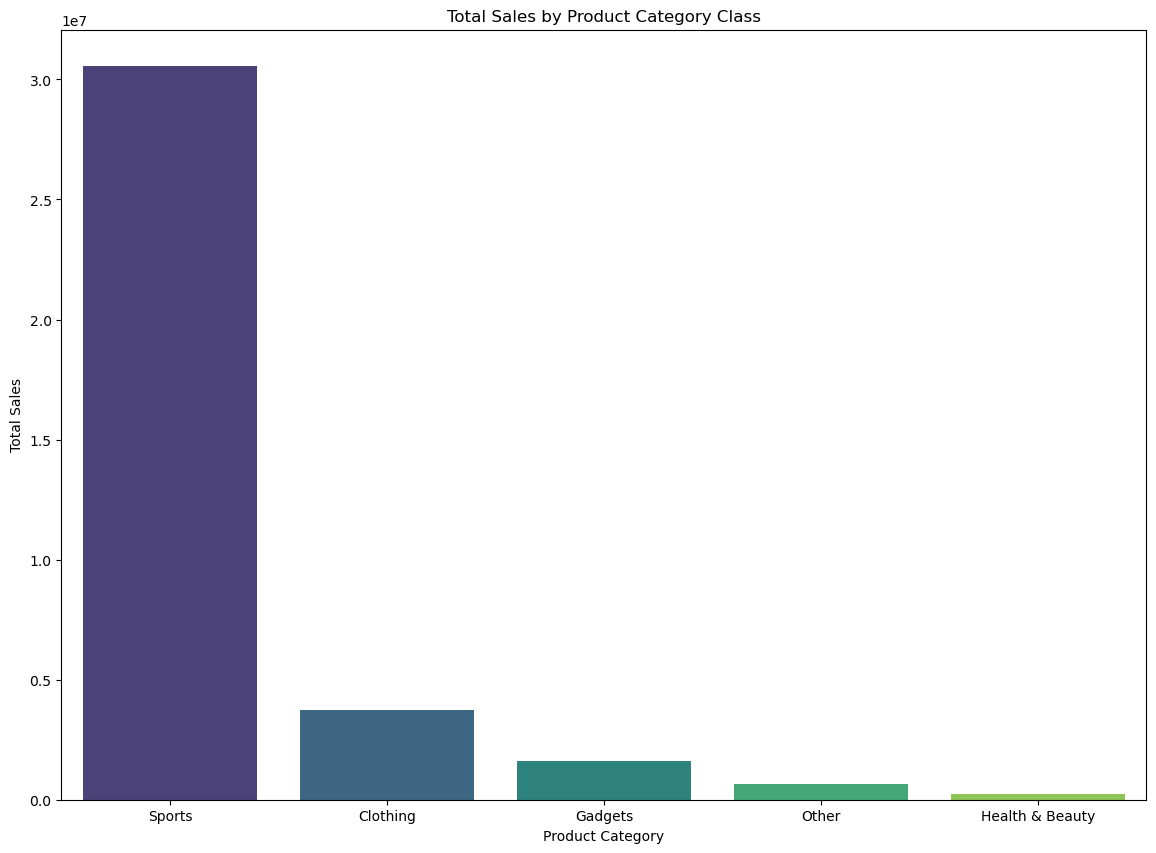

In [30]:
# Using bar-plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Category_Class', y='Sales', data=category_class_sales, palette="viridis")
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category Class')
plt.show()

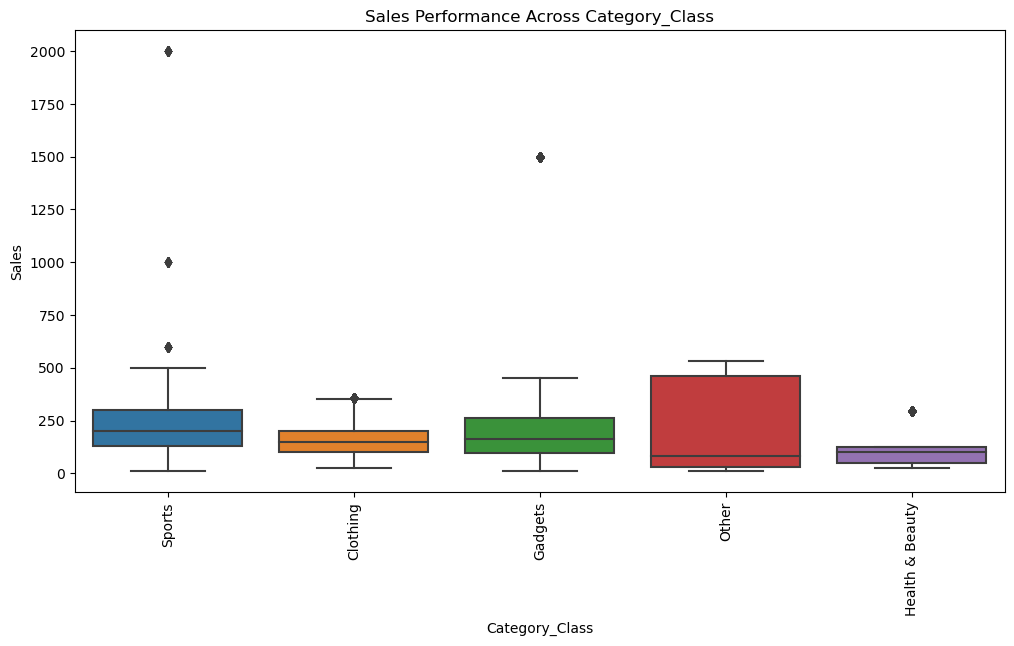

In [31]:
# Using box-plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category_Class', y='Sales', data=df)
plt.xticks(rotation=90)
plt.title('Sales Performance Across Category_Class')
plt.show()

In [32]:
df['Category_Class'].value_counts()

Sports             145460
Clothing            23953
Gadgets              5809
Other                3155
Health & Beauty      2142
Name: Category_Class, dtype: int64

Which product category has/have the maximum discount ?

In [37]:
# Grouping the data by 'Category_Class Name' and finding the maximum discount 
max_discount_per_product = df.groupby('Category_Class')['Order Item Discount'].max()
print(max_discount_per_product)
# Finding the product category with maximum discount
product_with_max_discount = max_discount_per_product.idxmax()
max_discount_value = max_discount_per_product.max()
print('----------------------------------------------------------')
print(f"The product with the maximum discount is '{product_with_max_discount}' with a discount of {max_discount_value:.2f}")

Category_Class
Clothing            89.279999
Gadgets            375.000000
Health & Beauty     73.260002
Other              133.149994
Sports             500.000000
Name: Order Item Discount, dtype: float64
----------------------------------------------------------
The product with the maximum discount is 'Sports' with a discount of 500.00


To investigate whether discounts impact sales, perform correlation analysis between the discount and sales figures.

In [38]:
# Calculate Pearson's correlation coefficient between 'Order Item Discount' and 'Sales'
correlation = df['Order Item Discount'].corr(df['Sales'])

print(f"Pearson's Correlation Coefficient between Discount and Sales: {correlation:.4f}")

Pearson's Correlation Coefficient between Discount and Sales: 0.6174


A value of 0.6174 suggests that there is a moderate positive correlation between the discount offered on items and the resulting sales figures.
This correlation coefficient suggests that as the discounts increase, there is a tendency for sales to also increase, though it doesn't necessarily imply causation. 

#### Analyze trends in sales over time: 
To analyze trends in sales over timeor across different customer segments using the provided sample dataset, we'll focus on the 'order date' and 'Sales' columns to visualize trends in sales over time.

In [39]:
# Convert 'order date' column to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [40]:
# Extract year and month from the 'order date' column
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month

In [41]:
# Aggregate sales by year and month
sales_over_time = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()

In [42]:
# Separate sales data for each year
years = sales_over_time['Order_Year'].unique()

# Plotting sales trend over time for each year separately
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

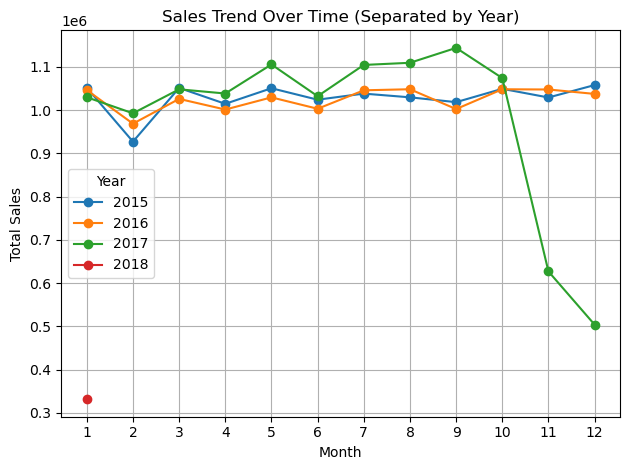

In [43]:
for year in years:
    year_data = sales_over_time[sales_over_time['Order_Year'] == year]
    plt.plot(year_data['Order_Month'], year_data['Sales'], marker='o', label=str(year))

plt.title('Sales Trend Over Time (Separated by Year)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))  # Assuming data spans all 12 months
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
# Filter the dataset for November (11th month) and December (12th month) of the year 2017
nov_dec_2017_data = df[
    (df['Order_Date'].dt.year == 2017) &
    (df['Order_Date'].dt.month.isin([11, 12]))
]

# Get the unique product categories bought during November and December 2017
product_categories_nov_dec_2017 = nov_dec_2017_data['Category Name'].unique()

print("Product categories bought in November and December 2017:")
print(product_categories_nov_dec_2017)

Product categories bought in November and December 2017:
['Consumer Electronics' 'Crafts' "Women's Clothing" "Men's Clothing"
 "Children's Clothing" 'Baby ' 'Sporting Goods' 'DVDs' 'Garden'
 'Computers' 'Pet Supplies' 'Health and Beauty' 'CDs ' 'Music' 'Books '
 'Video Games' 'Cameras ' 'Toys']


In [77]:
# Calculate the count of each category in the dataset
category_counts_overall = df['Category Name'].value_counts()

# Calculate the count of categories bought in Nov-Dec 2017
category_counts_nov_dec_2017 = nov_dec_2017_data['Category Name'].value_counts()

# Get the category classes for each category in Nov-Dec 2017
category_classes = df[df['Category Name'].isin(product_categories_nov_dec_2017)][['Category Name', 'Category_Class']]
category_classes = category_classes.drop_duplicates(subset=['Category Name'])

print("Category Counts in Nov-Dec 2017:")
print(category_counts_nov_dec_2017)
print("\nCategory Counts Overall:")
print(category_counts_overall)
print("\nCategory Classes for Nov-Dec 2017:")
print(category_classes)

Category Counts in Nov-Dec 2017:
Crafts                  484
DVDs                    476
Garden                  388
Consumer Electronics    382
Music                   290
Women's Clothing        272
Toys                    253
Pet Supplies            246
Health and Beauty       239
Video Games             228
Men's Clothing          177
Sporting Goods          145
CDs                     138
Children's Clothing     130
Baby                    125
Books                    97
Computers                92
Cameras                  17
Name: Category Name, dtype: int64

Category Counts Overall:
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves  

/var/folders/_t/rsrvp0sn5y9dm1hkj9xg2pkh0000gn/T/ipykernel_56764/2410797381.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(category_counts_nov_dec_2017_sorted.index, rotation=90)


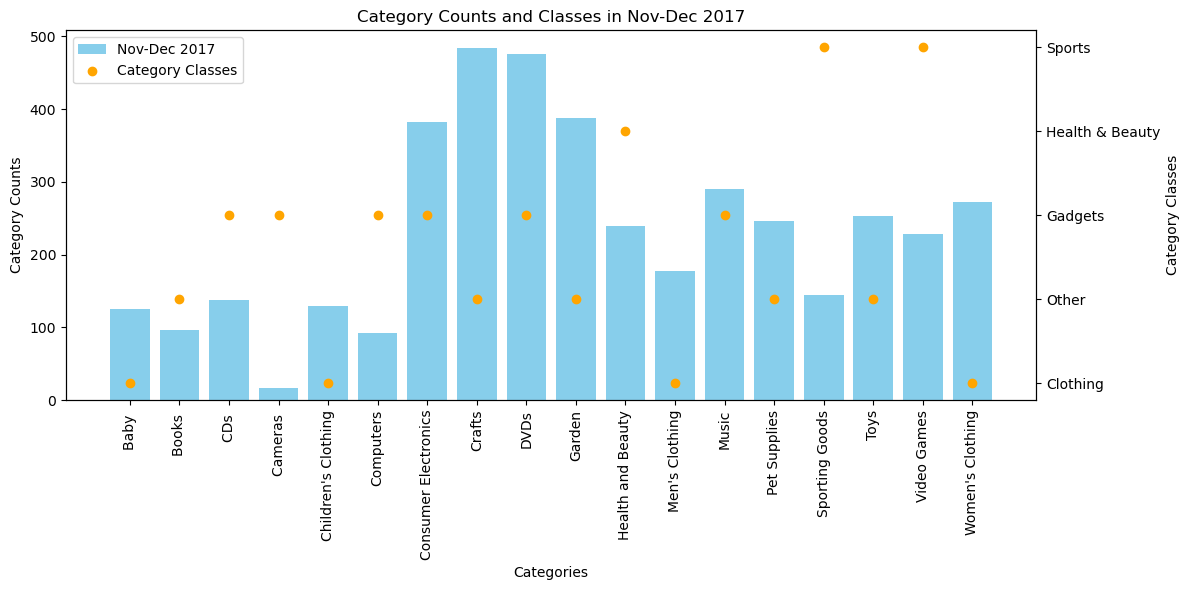

In [82]:
# Sort categories alphabetically for consistent representation
category_counts_nov_dec_2017_sorted = category_counts_nov_dec_2017.sort_index()
category_classes_sorted = category_classes.sort_values('Category Name')

# Create figure and two subplots sharing the x-axis
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plot category counts for Nov-Dec 2017
ax1.bar(category_counts_nov_dec_2017_sorted.index, category_counts_nov_dec_2017_sorted.values, color='skyblue', label='Nov-Dec 2017')
ax1.set_ylabel('Category Counts')

# Plot category classes for Nov-Dec 2017
ax2.scatter(category_classes_sorted['Category Name'], category_classes_sorted['Category_Class'], color='orange', marker='o', label='Category Classes')
ax2.set_ylabel('Category Classes')

# Set x-axis labels and rotation
ax1.set_xlabel('Categories')
ax1.set_xticklabels(category_counts_nov_dec_2017_sorted.index, rotation=90)

# Set legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Category Counts and Classes in Nov-Dec 2017')
plt.tight_layout()
plt.show()

In [67]:
# Filter the dataset for February of the years 2015, 2016, and 2017
feb_2015_2016_2017_data = df[
    (df['Order_Date'].dt.month == 2) &
    (df['Order_Date'].dt.year.isin([2015, 2016, 2017]))
]

# Get unique product categories for each year
feb_2015_categories = set(feb_2015_2016_2017_data[feb_2015_2016_2017_data['Order_Date'].dt.year == 2015]['Category Name'].unique())
feb_2016_categories = set(feb_2015_2016_2017_data[feb_2015_2016_2017_data['Order_Date'].dt.year == 2016]['Category Name'].unique())
feb_2017_categories = set(feb_2015_2016_2017_data[feb_2015_2016_2017_data['Order_Date'].dt.year == 2017]['Category Name'].unique())

# Find the product category bought in Feb 2015 that was also purchased in Feb 2016 and 2017
common_categories_15_16 = feb_2015_categories.intersection(feb_2016_categories)
common_categories_15_17 = feb_2015_categories.intersection(feb_2017_categories)

print("Product categories bought in Feb 2015 that were also purchased in Feb 2016:")
print(common_categories_15_16)
print("\nProduct categories bought in Feb 2015 that were also purchased in Feb 2017:")
print(common_categories_15_17)


Product categories bought in Feb 2015 that were also purchased in Feb 2016:
{'Indoor/Outdoor Games', 'Golf Shoes', 'Tennis & Racquet', 'Cleats', 'Electronics', 'Fitness Accessories', 'Camping & Hiking', 'Golf Apparel', 'Trade-In', 'Golf Balls', 'Boxing & MMA', "Men's Footwear", 'Lacrosse', 'Cardio Equipment', 'Golf Gloves', "Girls' Apparel", 'Accessories', 'Hockey', 'Hunting & Shooting', 'Water Sports', 'Fishing', 'Baseball & Softball', 'Shop By Sport', "Women's Apparel"}

Product categories bought in Feb 2015 that were also purchased in Feb 2017:
{'Indoor/Outdoor Games', 'Golf Shoes', 'Tennis & Racquet', 'Cleats', 'Electronics', 'Fitness Accessories', 'Camping & Hiking', 'Golf Apparel', 'Trade-In', 'Golf Balls', 'Boxing & MMA', "Men's Footwear", 'Lacrosse', 'Cardio Equipment', 'Golf Gloves', "Girls' Apparel", 'Accessories', 'Hockey', 'Hunting & Shooting', 'Water Sports', 'Fishing', 'Baseball & Softball', 'Shop By Sport', "Women's Apparel"}


In [71]:
pip install matplotlib_venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for matplotlib_venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=32999 sha256=2b3bb6f6e29e74b0d9c1254146af8da2169beaadcba6e401c58800e17a4a9df2
  Stored in directory: /Users/shikharaikhare/Library/Caches/pip/wheels/f6/80/48/193eff32ed8e176623b15874055438ecec522ba68ed05abee6
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.1 MB/s eta 0:00:002.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


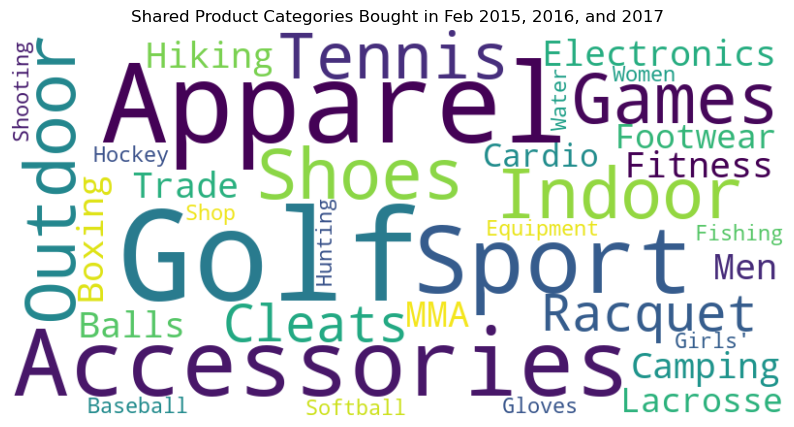

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the shared categories into a single list
shared_categories = common_categories_15_16.union(common_categories_15_17)

# Convert the set of shared categories to a single string
text = ' '.join(shared_categories)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Shared Product Categories Bought in Feb 2015, 2016, and 2017')
plt.axis('off')
plt.show()

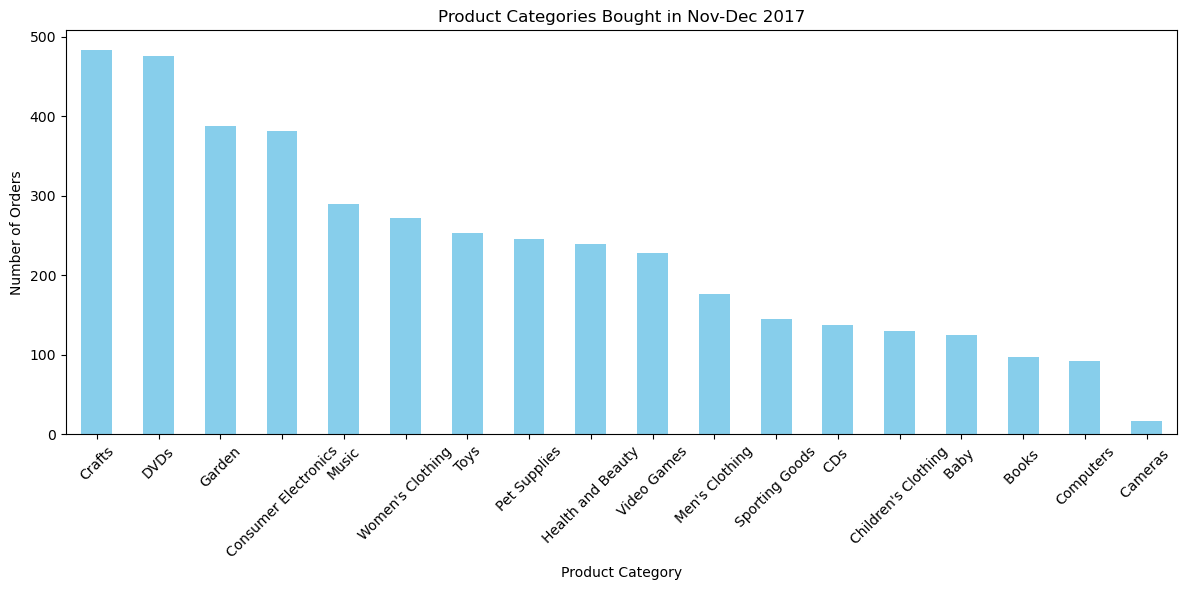

In [51]:
# Get the count of each product category
category_counts = nov_dec_2017_data['Category Name'].value_counts()

# Plotting a bar chart to visualize product categories bought in November and December 2017
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Product Categories Bought in Nov-Dec 2017')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
# Creating a table to display the product categories and their counts
category_table = pd.DataFrame({'Product Category': category_counts.index, 'Number of Orders': category_counts.values})
print("Table: Product Categories Bought in Nov-Dec 2017")
category_table

Table: Product Categories Bought in Nov-Dec 2017


,Product Category,Number of Orders
0,Crafts,484
1,DVDs,476
2,Garden,388
3,Consumer Electronics,382
4,Music,290
5,Women's Clothing,272
6,Toys,253
7,Pet Supplies,246
8,Health and Beauty,239
9,Video Games,228


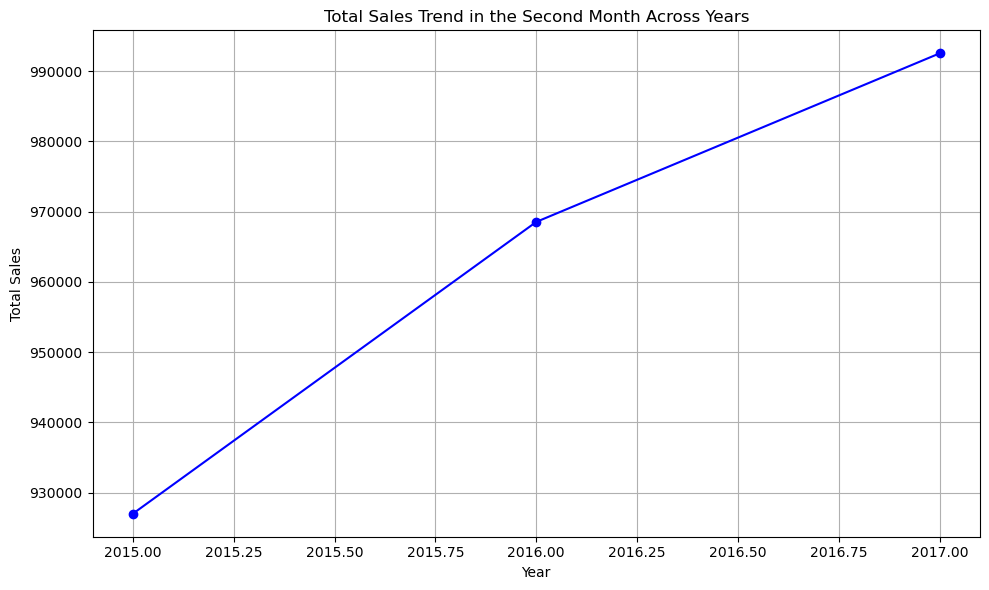

In [53]:
# Filter data for the second month (February - month number 2)
second_month_data = df[df['Order_Month'] == 2]

# Group by year and calculate total sales for February of each year
monthly_sales = second_month_data.groupby('Order_Year')['Sales'].sum()

# Plotting the line plot to visualize the drop in sales for the second month across years
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.title('Total Sales Trend in the Second Month Across Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

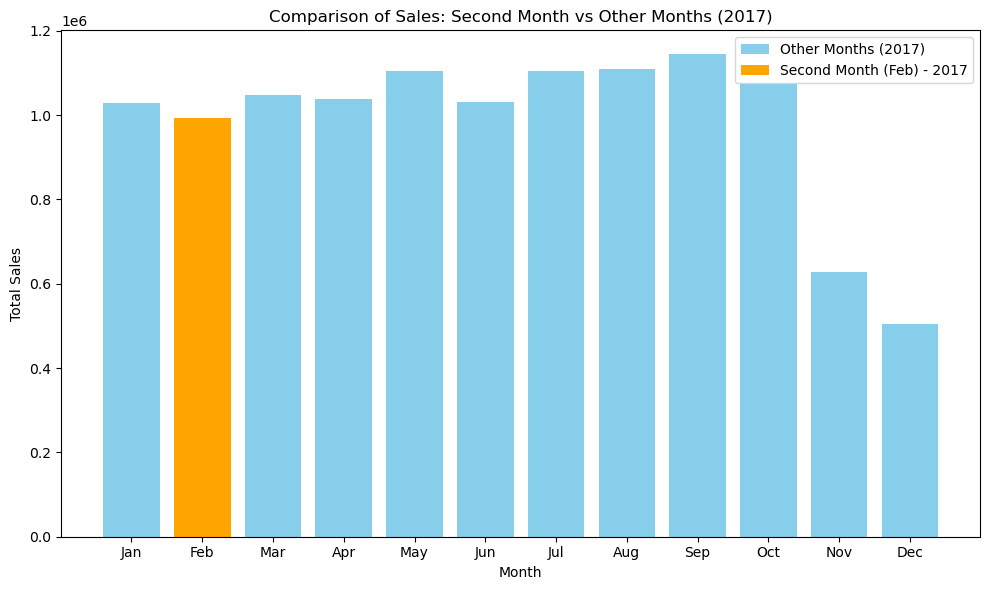

In [57]:
# Filter data for a specific year (e.g., 2017)
second_month_sales_2017 = df[(df['Order_Month'] == 2) & (df['Order_Year'] == 2017)]

# Group by month and calculate total sales for all months in 2017
monthly_sales_2017 = df[df['Order_Year'] == 2017].groupby('Order_Month')['Sales'].sum()

# Plotting the bar plot to compare sales of the second month (Feb) in 2017 with other months in 2017
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales_2017.index, monthly_sales_2017.values, color='skyblue', label='Other Months (2017)')
plt.bar(2, second_month_sales_2017['Sales'].sum(), color='orange', label='Second Month (Feb) - 2017')
plt.title('Comparison of Sales: Second Month vs Other Months (2017)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()
